In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Try with known dataset

In [2]:
# Load dataset
data = pd.read_csv("../datos/winequalityN.csv")
data.fillna(data.mean(), inplace=True)
#data["type"] = data["type"].astype('category').cat.codes
data

C:\Users\Miguel\AppData\Local\Temp/ipykernel_23852/3452786619.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,5


In [3]:
# Take descriptive variables
X = data[["fixed acidity",	"volatile acidity",	"citric acid",
          "residual sugar",	"chlorides",	"free sulfur dioxide",
          "total sulfur dioxide",	"density",	"pH",	"sulphates",	"alcohol"]].to_numpy()

print(X.shape)

(6497, 11)


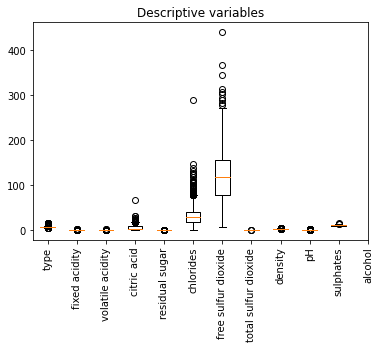

In [4]:
# See distribution of variables
plt.title('Descriptive variables')
plt.boxplot(X)
plt.xticks(ticks=range(1, 13), labels=data.keys()[:-1], rotation=90)
plt.show()

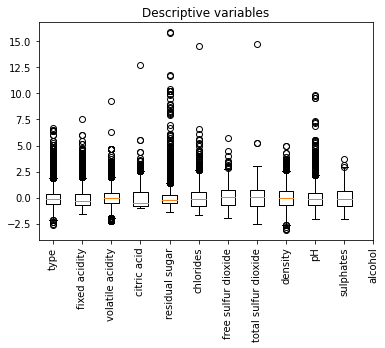

In [5]:
# Scale and plot again
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

plt.title('Descriptive variables')
plt.boxplot(X)
plt.xticks(ticks=range(1, 13), labels=data.keys()[:-1], rotation=90)
plt.show()

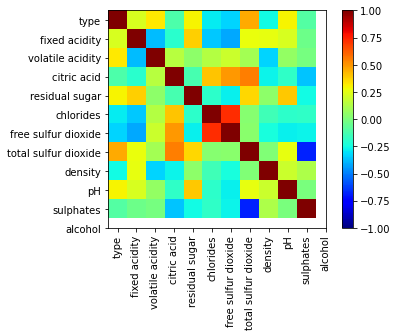

In [6]:
# See correlations
CM = pd.DataFrame(data=X).corr()

plt.imshow(CM, cmap='jet', vmin=-1, vmax=1, aspect='equal')
plt.colorbar()
plt.xticks(ticks=range(12), labels=data.keys()[:-1], rotation=90)
plt.yticks(ticks=range(12), labels=data.keys()[:-1])
plt.show()

In [7]:
# Train a PCA model
pcs = PCA(n_components=len(CM)).fit(X)
pcs

PCA(n_components=11)

In [9]:
# Report PCA summary
pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative variance': np.cumsum(pcs.explained_variance_ratio_)})

pcsSummary = pcsSummary.transpose()
pcsSummary.columns = ['PC'+str(ind) for ind in range(1, 12)]
pcsSummary.round(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
Standard deviation,1.741,1.579,1.247,0.986,0.849,0.779,0.724,0.708,0.581,0.477,0.182
Proportion of variance,0.275,0.227,0.141,0.088,0.065,0.055,0.048,0.046,0.031,0.021,0.003
Cumulative variance,0.275,0.502,0.643,0.732,0.797,0.852,0.900,0.946,0.976,0.997,1.000


In [11]:
# See the weights for each PC
pcsComponents = pd.DataFrame(pcs.components_.transpose(),
                             columns=['PC'+str(ind) for ind in range(1, 11)],
                             index=data.keys()[:-1])

pcsComponents

ValueError: Shape of passed values is (11, 11), indices imply (12, 10)

In [12]:
# Apply PCA transformation to original data
Z = pd.DataFrame(pcs.transform(X), columns=['PC'+str(ind) for ind in range(1, 12)])
Z

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258,0.005098,-0.267759,0.048630
1,-0.799170,1.856553,-0.911690,0.548066,-0.018392,0.929714,-1.009829,0.762587,-0.520707,0.062833,-0.138142
2,-0.748479,0.882039,-1.171394,0.411021,-0.043531,0.401473,-0.539553,0.597946,-0.086857,-0.187442,-0.118229
3,2.357673,-0.269976,0.243489,-0.928450,-1.499149,-0.131017,0.344290,-0.455375,0.091577,-0.130393,0.316714
4,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258,0.005098,-0.267759,0.048630
...,...,...,...,...,...,...,...,...,...,...,...
1594,-2.150500,0.814286,0.617063,0.407687,-0.240936,0.054835,0.170812,-0.355866,-0.971524,0.356851,-0.053382
1595,-2.214496,0.893101,1.807402,0.414003,0.119592,-0.674711,-0.607970,-0.247640,-1.058135,0.478879,-0.241258
1596,-1.456129,0.311746,1.124239,0.491877,0.193716,-0.506410,-0.231082,0.079382,-0.808773,0.242248,-0.402910
1597,-2.270518,0.979791,0.627965,0.639770,0.067735,-0.860408,-0.321487,-0.468876,-0.612248,0.779404,0.040923


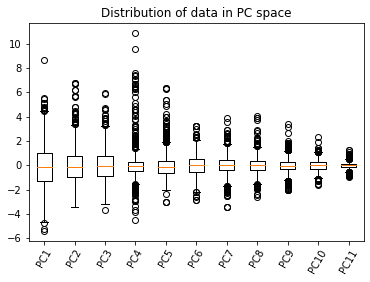

In [13]:
# Plot distribution of data
plt.title('Distribution of data in PC space')
plt.boxplot(pcs.transform(X))
plt.xticks(ticks=range(1, 12), labels=['PC'+str(ind) for ind in range(1, 12)], rotation=60)
plt.show()

In [ ]:
# X_test: nuevos datos. Aplicar la proyección PCA sobre nuevos datos
X_test = np.random.rand(100, 12)
Z_test = pcs.transform(X_test)
Z_test.shape

# Try different dataset

In [12]:
# Load data set
from tensorflow.keras.datasets import mnist
(_, _), (X, Y) = mnist.load_data()

print(X.shape)
print(Y.shape)

(10000, 28, 28)
(10000,)


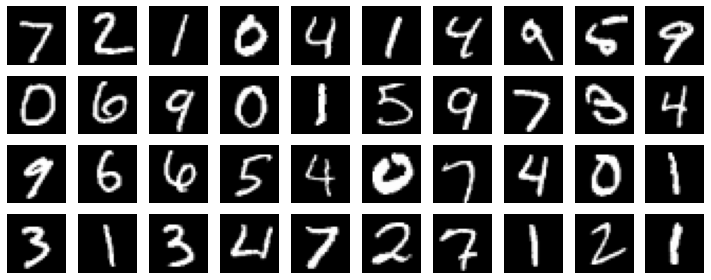

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7
 1 2 1]


In [13]:
# Show a few examples
plt.figure(figsize=(10, 4))
for ind in range(40):
    plt.subplot(4, 10, ind+1)
    plt.imshow(X[ind], cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

print(Y[:40])

In [14]:
# Reshape data into vector form
X = X.reshape(-1, 784)

print(X.shape)

(10000, 784)


In [15]:
# Split train and validation sets
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.33)

print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(6700, 784)
(3300, 784)
(6700,)
(3300,)


In [16]:
# Create a PCA object with all components and train it
pca_model = PCA(n_components=784)
pca_model.fit(x_train)

PCA(n_components=784)

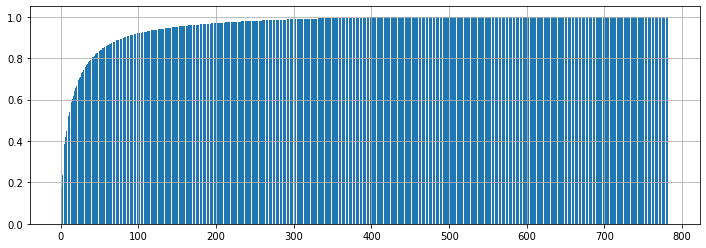

In [17]:
# Plot cumulative variance
var_cumsum = np.cumsum(pca_model.explained_variance_ratio_)
plt.figure(figsize=(12, 4))
plt.bar(range(784), var_cumsum)
plt.grid()
plt.show()

In [18]:
# Explica qué pasa aquí
idx = np.where(var_cumsum >= 0.95)[0][0]
print(f"{idx}: {var_cumsum[idx]:.4f}")

146: 0.9500


In [19]:
# Explica qué pasa aquí
pca_model = PCA(n_components=idx).fit(x_train)
print(pca_model.components_.shape)

(146, 784)


In [20]:
# Explica qué pasa aquí
z_train = pca_model.transform(x_train)
print(z_train.shape)

(6700, 146)


In [21]:
# Explica qué pasa aquí
x_train_hat = pca_model.inverse_transform(z_train)
print(x_train_hat.shape)

(6700, 784)


In [22]:
# Explica qué pasa aquí
reconstruc_error = np.abs(x_train - x_train_hat).mean()
print(f"Recontruction error: {reconstruc_error:.2f}")

Recontruction error: 8.18


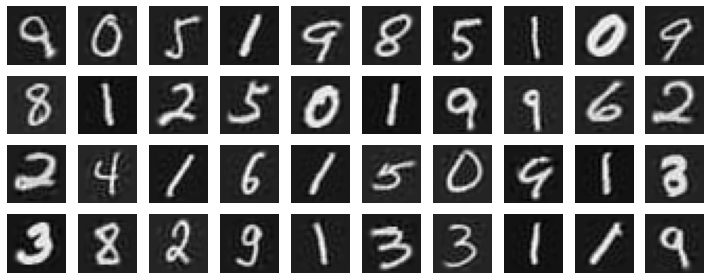

In [23]:
# Show a few examples
plt.figure(figsize=(10, 4))
for ind in range(40):
    plt.subplot(4, 10, ind+1)
    plt.imshow(x_train_hat[ind].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Challenge: verifica si hay diferencias en el desempeño de algún clasificador usando los espacios X y Z como variables explicativas

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [25]:
# Grid search over SVC using X space
hyperparams = {'kernel': ['poly', 'rbf'],
               'C': [0.1, 1.0, 10, 100, 1000],
               'degree': [1, 2, 3, 4, 5, 6],
               'coef0': [0, 1/2, 1, 2]}

gs_model = GridSearchCV(SVC(), hyperparams, n_jobs=-1, verbose=10)
gs_model.fit(x_train, y_train)

print(f"Best score: {gs_model.best_score_:.3f}")
print(f"Best params: {gs_model.best_params_}")

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


KeyboardInterrupt: 

In [ ]:
# Predict and print score
y_train_hat = gs_model.best_estimator_.predict(x_train)

print("true label: ", y_train[:10])
print("prediction: ", y_train_hat[:10])

print(f"MSE on the training set: {gs_model.score(x_train, y_train):.3f}")
print(f"MSE on the validation set: {gs_model.score(x_val, y_val):.3f}")

In [18]:
# Grid search over SVC using Z space
hyperparams = {'kernel': ['poly', 'rbf'],
               'C': [0.1, 1.0, 10, 100, 1000],
               'degree': [1, 2, 3, 4, 5, 6],
               'coef0': [0, 1/2, 1, 2]}

gs_model = GridSearchCV(SVC(), hyperparams, n_jobs=-1, verbose=10)
gs_model.fit(z_train, y_train)

print(f"Best score: {gs_model.best_score_:.3f}")
print(f"Best params: {gs_model.best_params_}")

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 5/5; 1/240] START C=0.1, coef0=0, degree=1, kernel=poly.....................
[CV 5/5; 1/240] END C=0.1, coef0=0, degree=1, kernel=poly;, score=0.902 total time=   7.4s
[CV 4/5; 3/240] START C=0.1, coef0=0, degree=2, kernel=poly.....................
[CV 4/5; 3/240] END C=0.1, coef0=0, degree=2, kernel=poly;, score=0.918 total time=  11.0s
[CV 2/5; 6/240] START C=0.1, coef0=0, degree=3, kernel=rbf......................
[CV 2/5; 6/240] END C=0.1, coef0=0, degree=3, kernel=rbf;, score=0.935 total time=  15.2s
[CV 4/5; 8/240] START C=0.1, coef0=0, degree=4, kernel=rbf......................
[CV 4/5; 8/240] END C=0.1, coef0=0, degree=4, kernel=rbf;, score=0.918 total time=  15.2s
[CV 2/5; 10/240] START C=0.1, coef0=0, degree=5, kernel=rbf.....................
[CV 2/5; 10/240] END C=0.1, coef0=0, degree=5, kernel=rbf;, score=0.935 total time=  14.8s
[CV 1/5; 12/240] START C=0.1, coef0=0, degree=6, kernel=rbf...................

In [20]:
# Predict and print score
y_train_hat = gs_model.best_estimator_.predict(z_train)

print("true label: ", y_train[:10])
print("prediction: ", y_train_hat[:10])

z_val = pca_model.transform(x_val)
print(z_val.shape)

print(f"MSE on the training set: {gs_model.score(z_train, y_train):.3f}")
print(f"MSE on the validation set: {gs_model.score(z_val, y_val):.3f}")

true label:  [9 5 1 7 7 9 1 2 9 1]
prediction:  [9 5 1 7 7 9 1 2 9 1]
(3300, 146)
MSE on the training set: 1.000
MSE on the validation set: 0.974
